# Tratamento Tempo


## Tratar dados 'tempo.csv'
## Aparência: sol, nublado, chuva
## Temperatura: -135 ~ 130 F
## Umidade: 0 ~ 100
## Jogar: sim/nao

In [134]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [135]:
dataset = pd.read_csv("tempo.csv", sep = ";")

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [112]:
#tamanho
dataset.shape

(14, 5)

In [113]:
# Verificar aparencia
agrupado = dataset.groupby(['Aparencia']).size()

agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

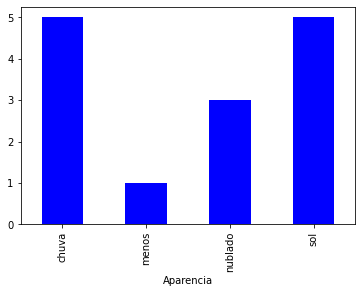

In [114]:
# Plotar aparencia

agrupado.plot.bar(color = 'blue')

In [115]:
# Verificar Vento

agrupado = dataset.groupby(['Vento']).size()

agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [116]:
# Verificar Jogar

agrupado = dataset.groupby(['Jogar']).size()

agrupado

Jogar
nao    5
sim    9
dtype: int64

In [117]:
# Verificar Temperatura

dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\gfkjy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

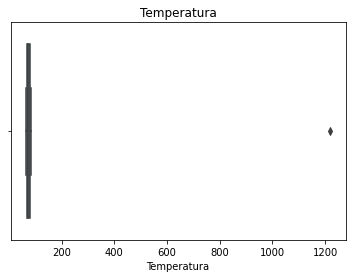

In [93]:
# Plotar Temperatura

srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\gfkjy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

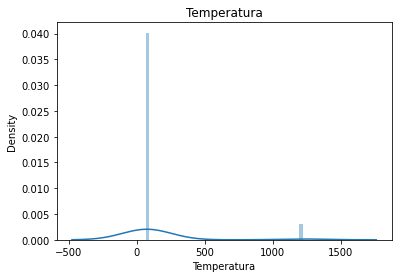

In [118]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [119]:
# Verificar Umidade

dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\gfkjy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

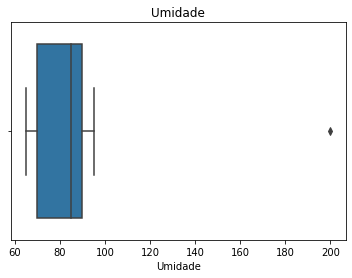

In [120]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\gfkjy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

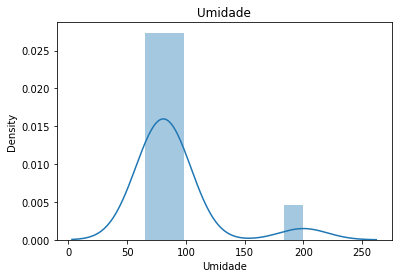

In [121]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [136]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [137]:
# Tratando Aparencia
# Tirar o 'menos' e adicionar a moda

dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [138]:
# Tratando Temperatura
# Uma temperatura está alem do valor permitido

dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [139]:
# Tratando Temperatura
# Calculando a mediana das temperaturas

mediana = sts.median(dataset['Temperatura'])
mediana


73.5

In [140]:
# Trocando a temperatura invalida pela mediana
dataset.loc[(dataset['Temperatura']< -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

# Verificando se a troca foi bem sucedida
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [141]:
# Tratando Umidade
# Um Valor de Umidade tava null

dataset['Umidade'].isnull().sum()

1

In [142]:
# Calculando a mediana de Umidade

mediana = sts.median(dataset['Umidade'])

mediana

85.5

In [143]:
# Colocando Umidade null pela mediana

dataset['Umidade'].fillna(mediana, inplace=True)

# Verificando se a troca foi feita
dataset['Umidade'].isnull().sum()


0

In [144]:
# Tratando Umidade
# Uma umidade está fora do dominio

dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]


,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [145]:
# Trocando o valor invalido de Unidade pela mediana

dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

#Verificando se a troca foi feita
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [148]:
# Tratando Vento
# Um valor de vento está como null

dataset['Vento'].isnull().sum()

1

In [151]:
# Trocando o elemento null por FALSO
dataset['Vento'].fillna('FALSO', inplace=True)

#  Verificando se a troca foi feita
dataset['Vento'].isnull().sum()

0

In [152]:
# Printando todo mundo só pra testar

dataset.loc[(dataset['Umidade'] > 0) | (dataset['Umidade'] < 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
